In [1]:
import numpy as np, curvedsky, plottools as pl, basic
from matplotlib.pyplot import *

In [2]:
Tcmb  = 2.726e6    # CMB temperature
lmax  = 4096       # maximum multipole of output normalization
rlmin, rlmax = 100, lmax  # reconstruction multipole range
sig   = 1.
ac2rad = np.pi/180./60.
L = np.linspace(0,lmax,lmax+1)

In [3]:
lcl = basic.aps.read_cambcls('../data/lensedcls.dat',2,lmax,4,bb=True)/Tcmb**2
lcl[2,:] *= 0.1 # delensing 
nl  = np.zeros((4,lmax+1))
nl[0,:] = (sig*ac2rad/Tcmb)**2
nl[1,:] = 2*nl[0,:]
nl[2,:] = 2*nl[0,:]
ocl = lcl + nl
ocl[0,3001:] = 1e30 # Tlmax = 3000

In [7]:
Al = {}
Al['TT'] = curvedsky.norm_quad.qtt('amp',lmax,rlmin,rlmax,lcl[0,:],ocl[0,:])[0]
Al['TE'] = curvedsky.norm_quad.qte('amp',lmax,rlmin,rlmax,lcl[3,:],ocl[0,:],ocl[1,:])[0]
Al['TB'] = curvedsky.norm_quad.qtb('amp',lmax,rlmin,rlmax,lcl[3,:],ocl[0,:],ocl[2,:])[0]
Al['EE'] = curvedsky.norm_quad.qee('amp',lmax,rlmin,rlmax,lcl[1,:],ocl[1,:])[0]
Al['EB'] = curvedsky.norm_quad.qeb('amp',lmax,rlmin,rlmax,lcl[1,:],ocl[1,:],ocl[2,:])[0]

In [8]:
l, cl_R10 = (np.loadtxt('../data/tt_TH_R10.0_a0.0.dat',usecols=(0,1))).T

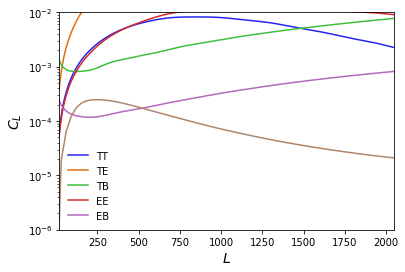

In [9]:
quad = ['TT','TE','TB','EE','EB']
pl.plot_1dstyle(ylog=True,ymin=1e-6,ymax=1e-2)
for q in quad:
    plot(L,L**2*Al[q]/np.sqrt(L+.5),label=q)
plot(l,l**2*cl_R10)
legend()